### WebScraping - output analysis part.
#### Authors
1. Michał Wrzesiński
2. Michał Woźniak
3. Rafał Rysiejko

## Agenda:
1. Salary statistics
2. Statistics about experience level
3. Company size ane employment type statistics
4. Tech stack comparison statistics

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from ast import literal_eval

In [4]:
os.chdir('/Users/rafalelpassion/Webscraping_2.0/web_scraping/project_selenium')

In [5]:
#Loading data
df = pd.read_csv('file_name.csv')

In [166]:
df.head()

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000,15000
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000,5800
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000,6000


In [57]:
#Split into minimum and maximum salary
df[['min','max']] = df.salary.str.split(pat = "-",expand=True) 

In [58]:
#Remove PLN net/month part
pattern = '|'.join(['PLN net/month', 'PLN gross/month', 'USD gross/month'])
df['max'] = df['max'].str.replace(pattern, '')

In [59]:
# Remove whitespaces and reassign as integers 
df['max'] = df['max'].str.replace(' ', '').astype(int)
df['min'] = df['min'].str.replace(' ', '').astype(int)

In [60]:
# Remove whitespaces and reassign as integers 
df['min'] = df['min'].astype(int)
df['min'] = df['min'].astype(int)

In [61]:
#df.head()

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000,15000
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000,5800
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000,6000


In [75]:
df1=df.copy()

In [76]:
# Converting salaries in foreign currency to PLN
USD=4.21
EUR=4.54

#df1["min"] = df["salary"].map(lambda x: df1["min"]*USD if "USD" in x else df1["min"]*EUR if "EUR" in x else df1["min"])
#df["max"] = df["salary"].apply(lambda x: df["max"]*USD if "USD" in x else df["max"]*EUR if "EUR" in x else df["min"])

In [77]:
df1.head()

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000,15000
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000,5800
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000,16000
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000,6000


In [78]:
# Converting USD to PLN
df1.loc[df.salary.str.contains('USD'),['min','max']]*=USD
df1.loc[df.salary.str.contains('EUR'),['min','max']]*=EUR

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000.0,15000.0
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000.0,5800.0
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,https://justjoin.it/offers/intitek-polska-prog...,Programista Hurtowni Danych,INTITEK Polska,100 - 200,b2b,mid,14 000 - 18 000 PLN net/month,"Al. Jana Pawła II 11, Warszawa","[{'Business Intelligence': 'regular'}, {'Data ...",http://www.intitek.fr/en/,True,Najbardziej szalone projekty realizuje się pos...,14000.0,18000.0
71,71,https://justjoin.it/offers/infullmobile-full-s...,Full Stack Developer,inFullMobile,50+,b2b,mid,12 000 - 17 000 PLN net/month,"Wilcza 46, Warszawa","[{'JavaScript': 'advanced'}, {'Unit Testing': ...",https://infullmobile.com/,True,As a inFullMobile Full Stack Developer you wil...,12000.0,17000.0
72,72,https://justjoin.it/offers/itds-reactjs-develo...,ReactJs Developer,ITDS,200+,b2b,mid,14 000 - 19 000 PLN net/month,"Zlota 59, Warszawa","[{'JavaScript': 'advanced'}, {'ReactJS': 'adva...",http://www.itds.pl/,True,"As a ReactJs Developer, you will design soluti...",14000.0,19000.0
73,73,https://justjoin.it/offers/sauce-labs-frontend...,Frontend Software Engineer,Sauce Labs,250 - 300,permanent,senior,4 500 - 5 500 USD gross/month,"Złota 59, Warszawa","[{'React': 'advanced'}, {'Redux': 'advanced'},...",https://saucelabs.com/,True,About us:\nIn today’s software-centric economy...,18945.0,23155.0


In [80]:
df2 = df1.copy()

In [81]:
### Adding a mean of each salary bracket
df2['mean'] = df[['min', 'max']].mean(axis=1)

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max,mean
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000.0,15000.0,12500.0
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0,12000.0
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000.0,5800.0,4400.0
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0,12000.0
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000.0,6000.0,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,https://justjoin.it/offers/tylko-frontend-deve...,Frontend Developer,Tylko,110,b2b,senior,10 000 - 13 000 PLN net/month,"Czerska 8/10, Warszawa","[{'JavaScript': 'advanced'}, {'HTML5': 'advanc...",https://tylko.com/,True,Who are we?\nTylko is a next-generation furnit...,10000.0,13000.0,11500.0
96,96,https://justjoin.it/offers/tylko-python-develo...,Python Developer (mid or senior level),Tylko,110,b2b,senior,8 000 - 12 000 PLN net/month,"Czerska 8/10, Warszawa","[{'Python': 'advanced'}, {'Django': 'regular'}...",https://tylko.com/,True,Who are we?\n\nTylko is a next-generation furn...,8000.0,12000.0,10000.0
97,97,https://justjoin.it/offers/batmaid-software-ar...,Software Architect,Batmaid,60,b2b,senior,18 000 - 25 000 PLN net/month,"Senatorska 2, Warszawa","[{'Microservices': 'master'}, {'Software Archi...",https://justjoin.it/brands/story/batmaid,True,About the company:\n\nBatmaid.com is the UBER ...,18000.0,25000.0,21500.0
98,98,https://justjoin.it/offers/new-digital-street-...,Senior/Mid+ Java Backend Developer,New Digital Street,10-30,b2b,senior,16 000 - 18 000 PLN net/month,"Centrum, Warszawa","[{'Java': 'master'}, {'REST': 'master'}, {'Hib...",http://www.newdigitalstreet.com/,True,Senior Java Backend Developer\nLocation: Wars...,16000.0,18000.0,17000.0


####  Histogram of minimal values of salary ranges, with mean (black line) and median (red line).

For this dataset: 
 Average salary: 12480 PLN. 
 Median salary: 13750 PLN 
 Min salary: 3000 PLN 
 Max salary: 21800 PLN.


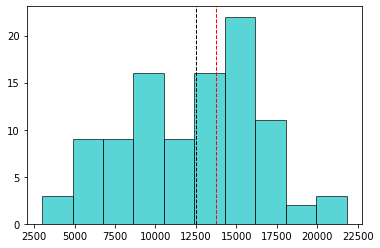

In [109]:
result = plt.hist(df2['min'], bins=10, color='c', edgecolor='k', alpha=0.65)
plt.axvline(df2['min'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df2['min'].median(), color='r', linestyle='dashed', linewidth=1)

print(f"For this dataset: \n Average salary: {df2['min'].mean():.0f} PLN. \n Median salary: {df2['min'].median():.0f} PLN \n Min salary: {df2['min'].min():.0f} PLN \n Max salary: {df2['min'].max():.0f} PLN.")

####  Histogram of mean values of salary ranges, with mean (black line) and median (red line).

For this dataset: 
 Average salary: 14641 PLN. 
 Median salary: 15750 PLN 
 Min salary: 4250 PLN 
 Max salary: 24900 PLN.


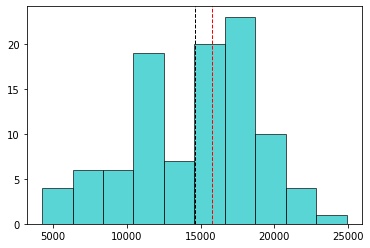

In [110]:
result = plt.hist(df2['mean'], bins=10, color='c', edgecolor='k', alpha=0.65)
plt.axvline(df2['mean'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df2['mean'].median(), color='r', linestyle='dashed', linewidth=1)

print(f"For this dataset: \n Average salary: {df2['mean'].mean():.0f} PLN. \n Median salary: {df2['mean'].median():.0f} PLN \n Min salary: {df2['mean'].min():.0f} PLN \n Max salary: {df2['mean'].max():.0f} PLN.")

####  Histogram of maximal values of salary ranges, with mean (black line) and median (red line).

For this dataset: 
 Average salary: 17123 PLN. 
 Median salary: 18000 PLN 
 Min salary: 4500 PLN 
 Max salary: 28000 PLN.


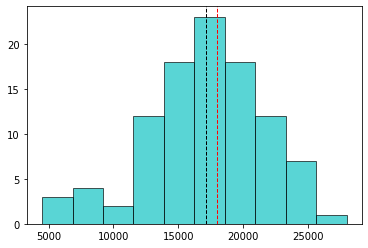

In [111]:
result = plt.hist(df2['max'], bins=10, color='c', edgecolor='k', alpha=0.65)
plt.axvline(df2['max'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df2['max'].median(), color='r', linestyle='dashed', linewidth=1)

print(f"For this dataset: \n Average salary: {df2['max'].mean():.0f} PLN. \n Median salary: {df2['max'].median():.0f} PLN \n Min salary: {df2['max'].min():.0f} PLN \n Max salary: {df2['max'].max():.0f} PLN.")

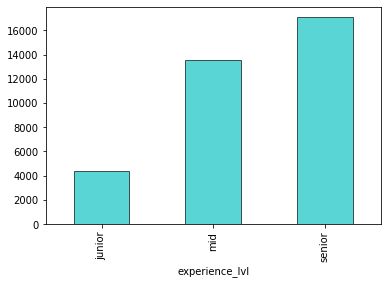

In [153]:
df2.groupby("experience_lvl")['mean'].mean().plot(kind='bar',color='c', edgecolor='k', alpha=0.65)

#### Percentage share of offers for different experience levels

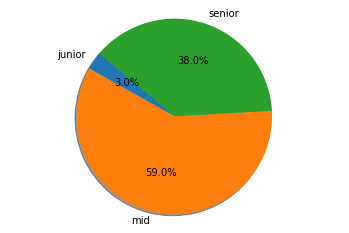

In [226]:
labels = df2.groupby("experience_lvl")['experience_lvl'].count().index.values
values = df2.groupby("experience_lvl")['experience_lvl'].count()

plt.pie(values,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#### Percentage share of offers for different employment types

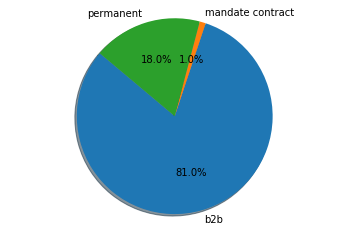

In [227]:
labels = df2.groupby("empoyment_type")['empoyment_type'].count().index.values
values = df2.groupby("empoyment_type")['empoyment_type'].count()

plt.pie(values,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [209]:
df3=df2.copy()

In [210]:
df3[['lower_bound','upper_bound']] = df.company_size.str.split(pat = "-",expand=True) 

In [211]:
pattern = '|'.join(['>',"\\+", '<'])
df3['lower_bound'] = df['lower_bound'].str.replace(pattern, '')
df3['upper_bound'] = df['upper_bound'].str.replace(pattern, '')

#df3['lower_bound'] = df3['lower_bound'].str.replace(' ', '').astype(int)
#df3['upper_bound'] = df3['upper_bound'].str.replace(' ', '').astype(int)

In [212]:
df3['upper_bound'] = df3['upper_bound'].fillna(df3['lower_bound'])
df3['upper_bound'] = df3['upper_bound'].str.replace(' ', '').astype(int)

,Unnamed: 0,offer_link,offer_title,company_name,company_size,empoyment_type,experience_lvl,salary,place,tech_stack,direct_apply,company_page,offer_description_list,min,max,mean,lower_bound,upper_bound
0,0,https://justjoin.it/offers/cybersecurity-studi...,Backend Developer,Cybersecurity Studio sp. z o.o.,<10,b2b,mid,10 000 - 15 000 PLN net/month,"Gdańska 2, Warszawa","[{'.Net': 'regular'}, {'ELK Stack': 'regular'}...",http://www.cyberstudio.systems/,True,Cybersecurity.studio to przede wszystkim zespó...,10000.0,15000.0,12500.0,10,10
1,1,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Backend Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'Django': 'advanced'...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0,12000.0,40,45
2,2,https://justjoin.it/offers/el-passion-junior-a...,Junior Android Developer,EL Passion,50+,b2b,junior,3 000 - 5 800 PLN net/month,"Plac Europejski 2, Warszawa","[{'Java': 'junior'}, {'Git': 'junior'}, {'Andr...",http://www.elpassion.com/,True,"We are EL Passion, one of the leading software...",3000.0,5800.0,4400.0,50,50
3,3,https://justjoin.it/offers/sunscrapers-sp-z-o-...,Fullstack Engineer,Sunscrapers Sp. z o. o.,40-45,b2b,mid,8 000 - 16 000 PLN net/month,"Pokorna 2/947, Warszawa","[{'Python': 'advanced'}, {'JavaScript (ES6+)':...",https://sunscrapers.com/,True,Are you ready to take the challenge?\n\nWe’re ...,8000.0,16000.0,12000.0,40,45
4,4,https://justjoin.it/offers/risenet-sp-z-o-o-ju...,Junior PHP Developer,Risenet Sp. z o.o.,5 - 10,b2b,junior,3 000 - 6 000 PLN net/month,"Al. Jerozolimskie 123A, Warszawa","[{'HTML5/CSS3': 'advanced'}, {'JavaScript': 'r...",https://risenet.pl/,True,"Risenet to software house, specjalizujący się ...",3000.0,6000.0,4500.0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,https://justjoin.it/offers/tylko-frontend-deve...,Frontend Developer,Tylko,110,b2b,senior,10 000 - 13 000 PLN net/month,"Czerska 8/10, Warszawa","[{'JavaScript': 'advanced'}, {'HTML5': 'advanc...",https://tylko.com/,True,Who are we?\nTylko is a next-generation furnit...,10000.0,13000.0,11500.0,110,110
96,96,https://justjoin.it/offers/tylko-python-develo...,Python Developer (mid or senior level),Tylko,110,b2b,senior,8 000 - 12 000 PLN net/month,"Czerska 8/10, Warszawa","[{'Python': 'advanced'}, {'Django': 'regular'}...",https://tylko.com/,True,Who are we?\n\nTylko is a next-generation furn...,8000.0,12000.0,10000.0,110,110
97,97,https://justjoin.it/offers/batmaid-software-ar...,Software Architect,Batmaid,60,b2b,senior,18 000 - 25 000 PLN net/month,"Senatorska 2, Warszawa","[{'Microservices': 'master'}, {'Software Archi...",https://justjoin.it/brands/story/batmaid,True,About the company:\n\nBatmaid.com is the UBER ...,18000.0,25000.0,21500.0,60,60
98,98,https://justjoin.it/offers/new-digital-street-...,Senior/Mid+ Java Backend Developer,New Digital Street,10-30,b2b,senior,16 000 - 18 000 PLN net/month,"Centrum, Warszawa","[{'Java': 'master'}, {'REST': 'master'}, {'Hib...",http://www.newdigitalstreet.com/,True,Senior Java Backend Developer\nLocation: Wars...,16000.0,18000.0,17000.0,10,30


In [267]:
# Binning company sizes into broader categories
bins = [0,10,20,50,100,10000]
labels=['<10','10-20','20-50','50-100','>100']

df3['size_bin'] = pd.cut(df3['upper_bound'],bins=bins,labels=labels)

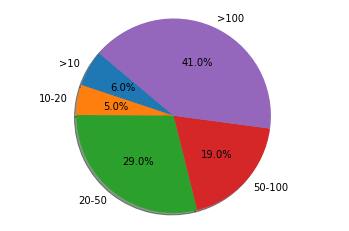

In [224]:
labels = df3.groupby("size_bin")['size_bin'].count().index.values
values = df3.groupby("size_bin")['size_bin'].count()

plt.pie(values,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [228]:
### Technologies statistics

In [91]:
tech_stack = []
for item in df['tech_stack']:
    x = literal_eval(item)
    for i in x:
        dict = i
        tech_stack.append(dict)
        
d = {'technology':technology,'lvl':adv_level}
df_tech_stack = pd.DataFrame(d)

### Top 10 offers in term of count in all scraped data.

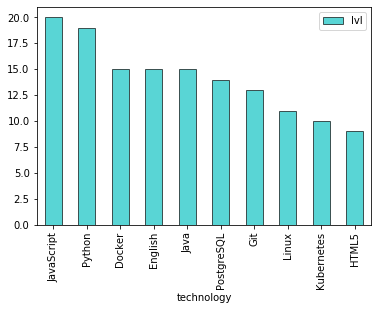

In [90]:
df_tech_stack.groupby(['technology']).count().nlargest(10,'lvl').plot(kind='bar',color='c', edgecolor='k', alpha=0.65)
plt.show()

### Percentage share of advancement level in all technologies.

/Users/rafalelpassion/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


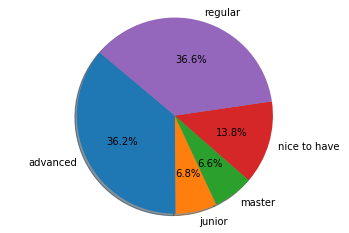

In [93]:
labels = df_tech_stack.groupby(['lvl']).count().index.values
values = df_tech_stack.groupby(['lvl']).count()

plt.pie(values,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Percentage share of advancement level in Python.

/Users/rafalelpassion/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


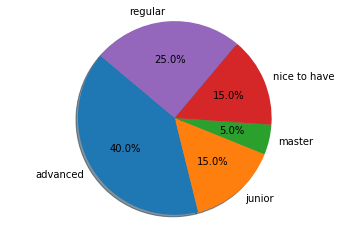

In [101]:
df_tech_stack_python = df_tech_stack.loc[df_tech_stack['technology'].str.contains('Python')]

labels = df_tech_stack_python.groupby(['lvl']).count().index.values
values = df_tech_stack_python.groupby(['lvl']).count()

plt.pie(values,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()